Notion: https://glimmer-brie-6b7.notion.site/NLRP3-Simulation-dbdca9c949ed45328ed2d1f312a3cf99

Github: https://github.com/tengyulin/synth_cryoEM

In [1]:
import os
import numpy as np
import scipy

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, minmax_scale

In [2]:
def free_energy3d(n_motions, embedding):
    # counts
    gridx = np.linspace(0, 1, n_motions+1)
    gridy = np.linspace(0, 1, n_motions+1)
    gridz = np.linspace(0, 1, n_motions+1)
    grids, edges = np.histogramdd(embedding,  bins=[gridx, gridy, gridz])
    grids = grids.T
    # energy
    E = -np.log(grids/np.max(grids))
    E[E==np.inf] = np.unique(E)[-2] + 0.00001 # replace inf to second highest energy plus constant.
    return E

In [3]:
workdir = '/home/danlin/synth_nlrp3/3_Occupancies'

Text(0.5, 0, 'Conformational changes1')

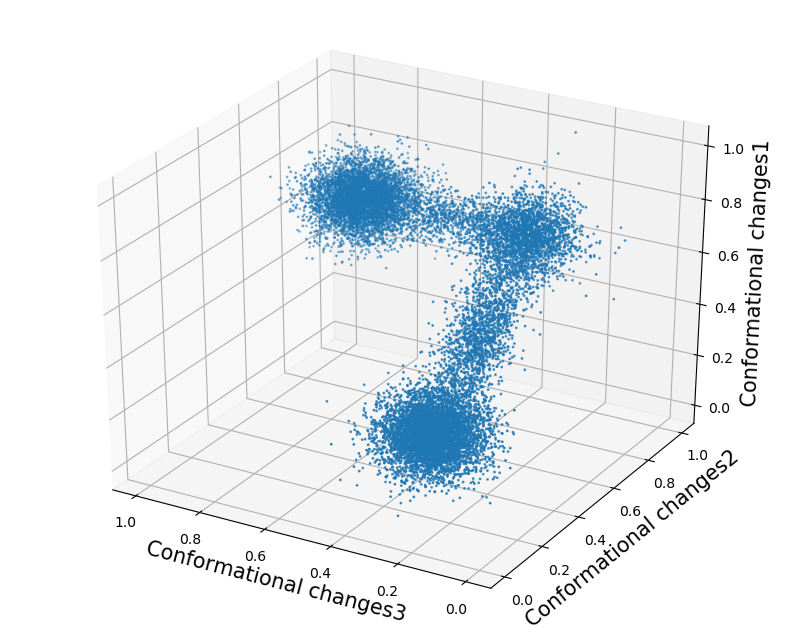

In [45]:
np.random.seed(915)
center_samples = 5000
transition_samples = 2000

center1 = np.random.normal(0, 8, size=(center_samples, 3)) + np.array([-30, -30, -30])
transition = np.random.normal(0, 8, size=(transition_samples, 3)) + np.array([-30, 30, 30])
center2 = np.random.normal(0, 8, size=(center_samples, 3)) + np.array([30, 30, 30])

transition_path_samples = 1000
C = np.array(
    [[0.0, 5.5, 0.0], 
    [15.5, 0.0, 0.0],
    [0.0, 0.0, 5.5]]
)
path_upper_horizon = np.dot(np.random.normal(0, 1, size=(transition_path_samples, 3)), C) + np.array([0, 30, 30])
C2 = np.array(
    [[0.0, 15.5, 15.5], 
    [5.5, 0.0, 0.0],
    [0.0, 0.0, 5.5]]
)
path_dig = np.dot(np.random.normal(0, 1, size=(transition_path_samples*2, 3)), C2) + np.array([-30, 0, 0])

x = np.vstack([center1, transition, center2, path_upper_horizon, path_dig])
x = minmax_scale(x)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], s=1.0)
ax.invert_xaxis()
ax.set_xlabel("Conformational changes3", fontsize=15)
ax.set_ylabel("Conformational changes2", fontsize=15)
ax.set_zlabel("Conformational changes1", fontsize=15)
#ax.view_init(30,-150)

In [37]:
n_motions = 20
gridx = np.linspace(0, 1, n_motions+1)
gridy = np.linspace(0, 1, n_motions+1)
gridz = np.linspace(0, 1, n_motions+1)
grids, edges = np.histogramdd(x,  bins=[gridx, gridy, gridz])

counts = grids.flatten()

# Scale the counts using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
counts_scaled = scaler.fit_transform(counts.reshape(-1, 1))

# Reshape the scaled counts to match the shape of the original histogram
occ = counts_scaled.reshape(grids.shape)
occ = np.floor(occ)

#Add noise
noise_rate = 4000
np.random.seed(915)
random_int = np.random.randint(0,20,size=(3,noise_rate))
occ[random_int[0], random_int[1], random_int[2]] += 1


#for z in range(n_motions):
#    plt.imshow(occ[:,:,z], cmap='jet', vmin=0, vmax=10)
#    plt.title(f"z={z}")
#    plt.colorbar()
#    plt.show()

In [6]:
print(np.sum(occ))

3778.0


In [7]:
np.save(f'{workdir}/nlrp3_noise_3778.npy', occ)